# Язык программирования Python

## Домашнее задание | СКБ

### Модуль 2

## Разделы и баллы

|#|Раздел|Баллы|
|-|------|-----|
|1|Numpy|12|
|2|Matplotlib|10|
|3|Pandas|14|
|4|Scipy|14|
|5|Numba|14|
|6|Classes|14|
|7|Generators|10|
|8|Decorators and Context Managers|12|
|9|Всего|100|

## Numpy [12/100]

При решении задач этого раздела подразумевается максимальное использование возможностей `Numpy`.

За использование любых сторонних циклов и их заменителей (итераторов, генераторов и др.) выставляется штраф.

### Numpy A [4/100]

В файле `elements.npz` расположены два массива:
- `nodes` - массив (N, 2), содержащий координаты точек (float)
- `tris` - массив (M, 3), содержащий тройки индексов (i, j, k) такие, что точки с индексами i, j, k из массива `nodes` образуют треугольник

Требуется для всех треугольников:
- вычислить:
    - координаты геометрических центров
    - площади
    - величины минимальных углов
- проверить утверждение:
    - во всех треугольниках вершины расположены по/против часовой стрелки

In [130]:
import numpy as np
import matplotlib 

data = np.load('elements.npz')

nodes, tris = data['nodes'], data['tris']

tris = tris.astype("int")

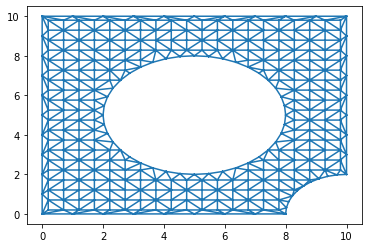

In [137]:
triangs = matplotlib.tri.Triangulation(nodes.T[0], nodes.T[1], tris)
triangs
matplotlib.pyplot.triplot(triangs)

In [128]:
triangles_list = nodes[tris]
triangles_list

array([[[ 0.        ,  9.        ],
        [ 0.        ,  8.        ],
        [ 0.2       ,  8.28421053]],

       [[ 1.        , 10.        ],
        [ 1.71578947,  9.8       ],
        [ 2.        , 10.        ]],

       [[ 0.70526316,  9.8       ],
        [ 1.        , 10.        ],
        [ 0.        , 10.        ]],

       ...,

       [[ 2.72631579,  0.70526316],
        [ 2.72631579,  0.2       ],
        [ 3.23157895,  0.70526316]],

       [[ 2.72631579,  0.2       ],
        [ 2.22105263,  0.70526316],
        [ 2.22105263,  0.2       ]],

       [[ 2.72631579,  0.2       ],
        [ 2.72631579,  0.70526316],
        [ 2.22105263,  0.70526316]]])

In [101]:
def geom_center(trig):
    '''
    Делим одну сторону, проводим медиану к ней, делим медиану в отношении 2:1 от вершины
    '''
    sides = np.transpose(trig)
    center = np.array([np.sum(sides[0])/3, np.sum(sides[1])/3])
    return center

centers_list = np.array(list(map(geom_center, triangles_list)))

centers_list

array([[0.06666667, 8.42807018],
       [1.57192982, 9.93333333],
       [0.56842105, 9.93333333],
       ...,
       [2.89473684, 0.53684211],
       [2.38947368, 0.36842105],
       [2.55789474, 0.53684211]])

In [113]:
def calc_area(trig):
#     sides = np.transpose(trig)
    sides = np.append(trig, np.ones((3,1)), axis=1)
    s = 0.5*np.linalg.det(sides)
    return s

area_list = list(map(calc_area, triangles_list))

area_list;

[0.10000000000000005,
 0.09999999999999838,
 0.09999999999999844,
 0.09999999999999874,
 0.05052631578947367,
 0.08935923103523125,
 0.09999999999999945,
 0.09999999999999896,
 0.09999999999999919,
 0.08935923103523141,
 0.08113149588135855,
 0.08113149588135848,
 0.12400910826479204,
 0.10889456271924126,
 0.09999999999999844,
 0.0999999999999986,
 0.050526315789473045,
 0.05056158557918973,
 0.07180055401662053,
 0.050526315789473045,
 0.050526315789472864,
 0.05052631578947311,
 0.05052631578947367,
 0.1,
 0.05052631578947385,
 0.09999999999999888,
 0.0505263157894732,
 0.05052631578947318,
 0.10000000000000003,
 0.05052631578947358,
 0.05052631578947313,
 0.05052631578947336,
 0.050526315789472975,
 0.050526315789472996,
 0.050526315789472864,
 0.0713559533968888,
 0.0712457865183385,
 0.1240091082647925,
 0.10889456271924125,
 0.12764542936288073,
 0.1294426987626676,
 0.08935923103523138,
 0.08935923103523107,
 0.09999999999999844,
 0.050526315789472864,
 0.050526315789472906,
 0

In [14]:
def min_angle(trig):
#     vec = [[trig[i%3] - trig[(i+1)%3], trig[i%3] - trig[(i+2)%3]] for i in range(3)]
#     vec = np.append(trig-trig[[1,2,0]], trig-trig[[2,0,1]]).reshape(6,2)
    vec = [[trig[0]-trig[1],trig[0]-trig[2]],[trig[1]-trig[2],trig[1]-trig[0]],[trig[2]-trig[0], trig[2]-trig[1]]]
#     angles = [np.arccos(np.dot(vec[i][0], vec[i][1])/np.linalg.norm(vec[i][0])/np.linalg.norm(vec[i][1])) for i in range(3)]
#     vec = np.insert(trig-trig[[1,2,0]], [2], trig-trig[[2,0,1]], axis=1)
    angles = list(map(lambda x: np.arccos(np.dot(x[0], x[1])/np.linalg.norm(x[0])/np.linalg.norm(x[1])), vec))
#     return np.degrees(np.min(angles))
    return np.degrees(np.min(angles))
    

min_angle_list = list(map(min_angle, triangles_list))
min_angle_list;

In [15]:
def check_if_clockwise(trig):
    vec = list(map(lambda x, y: x-y, trig[:2], trig[1:]))
    if False in list(map(lambda x: (np.prod(x))>=0, vec)):
        return False
    return True
    
print('во всех треугольниках вершины расположены по часовой стрелки: ',
      not(False in list(map(check_if_clockwise, triangles_list))))

print('во всех треугольниках вершины расположены против часовой стрелки: ',
      not(False in list(map(check_if_clockwise, triangles_list))))

во всех треугольниках вершины расположены по часовой стрелки:  False
во всех треугольниках вершины расположены против часовой стрелки:  False


### Numpy B [8/100]

В файлах `000e08.png`, `0b1153.png`, `1b601b.png` находятся зашифрованные сообщения, которые следует отыскать. Должно быть продемонстрировано изображение дешифрованного сообщения, которое можно прочитать как обычный текст, без дополнительных затруднений.

Пояснения:

В одном из слоев (R, G, B) изображения размещен текст сообщения и поверх него наложен шум. Такой же шум, но подверженный изменениям, сохранен в другом слое изображения. Изменения включают в себя: перестановки четвертей изображения, их повороты, транспонирования, отражения, инвертирования. Ориентируясь по символам, размещенным поверх шума, нужно сделать два упомянутых выше слоя как можно более похожими друг на друга, после чего вычитание одного из другого поможет удалить шум и открыть сообщение.

<table>
    <tr>
        <td><img src='000e08.png' width=200/>000e08.png</td>
        <td><img src='0b1153.png' width=200/>0b1153.png</td>
        <td><img src='1b601b.png' width=200/>1b601b.png</td>
    </tr>
</table>

In [74]:
import matplotlib.pyplot as plt

image1 = img.imread('000e08.png')
w, h, cs = image1.shape
r1, g1, b1 = image1.T
r11, r12, r13, r14 = r1[:256,:256], r1[:256,256:], r1[256:, :256], r1[256:, 256:]
b11, b12, b13, b14 = b1[:256,:256], b1[:256,256:], b1[256:, :256], b1[256:, 256:]
# image2 = img.imread('0b1153.png')
# r2, g2, b2 = image2.T[0], image2.T[1], image2.T[2]

# image3 = img.imread('1b601b.png')
# r3, g3, b3 = image3.T[0], image3.T[1], image3.T[2]

# plt.imshow(g1.T)
# plt.imshow(b11-r11[::-1])

## Matplotlib [10/100]

### Matplotlib A [5/100]

Используя данные из задачи **Numpy A** визуализировать:
- точки
- треугольники (цветом треугольника показать его площадь)
- центры треугольников

Выполнить поворот всех треугольников:
 - относительно геометрического центра на -90 градусов,
 - затем на 90, 180, 270, 360 градусов вокруг начала координат и визуализировать все 4 повернутых фигуры на одном рисунке способом, указанным в начале задания.

### Matplotlib B [5/100]

Повторить рисунок:

![arctan_x_cos_y.png](arctan_x_cos_y.png)

<ipython-input-752-c7f144491e06>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels([r'$-\frac{\pi}{3}$', r'$-\frac{\pi}{6}$', 0, r'$\frac{\pi}{6}$', r'$\frac{\pi}{3}$'])


Text(0.5, 1.0, '$f(x, y) = arctan(x)\\cdot cos(y)$')

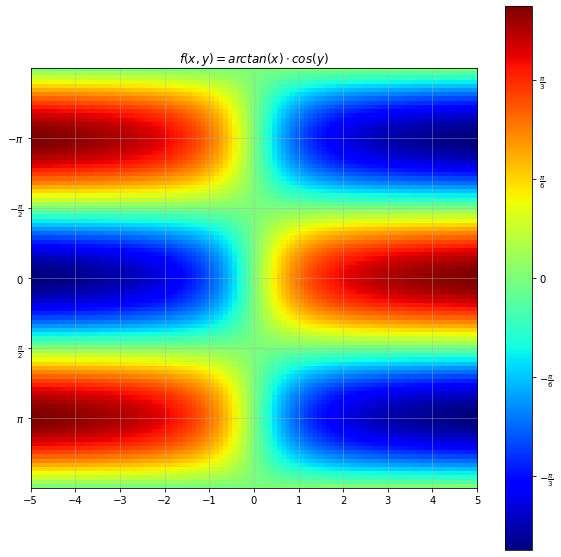

In [752]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
y = np.linspace(-3*np.pi/2, 3*np.pi/2, 100).reshape(-1,1)
f = np.arctan(x)*np.cos(y)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
g = ax.imshow(f, cmap='jet', extent=[x.min(), x.max(), y.min(), y.max()])

yticklabels = [r'$\pi$', r'$\frac{\pi}{2}$', r'$0$', r'$-\frac{\pi}{2}$', r'$-\pi$']
cb = fig.colorbar(g)
ax.set_xticks(np.arange(-5, 6))
ax.set_yticks(np.arange(-np.pi, 3*np.pi/2, np.pi/2))
ax.set_yticklabels(yticklabels)
cb.ax.set_yticklabels([r'$-\frac{\pi}{3}$', r'$-\frac{\pi}{6}$', 0, r'$\frac{\pi}{6}$', r'$\frac{\pi}{3}$'])
ax.grid('--', alpha=0.5)
ax.set_title(r'$f(x, y) = arctan(x)\cdot cos(y)$')


## Pandas [14/100]

При решении задач этого раздела подразумевается максимальное использование возможностей `pandas` и допускается использование `numpy`.

За использование любых сторонних циклов и их заменителей (итераторов, генераторов и др.) выставляется штраф.

### Pandas A [6/100]

В файле `fin.csv` находятся записи о доходах и расходах физического лица.

Требуется рассчитать:

- среднемесячный доход для каждого года,
- среднемесячный расход по каждой категории для каждого года,
- сводную таблицу суммарных расходов: строки - Категория/Год, столбцы - Месяц,
- состояние счета физического лица на каждый день и изобразить график (в начальный момент времени счет был нулевым),
- даты, когда счет становился отрицательным,
- построить прогноз (линейный и квадратичный) состояния счета через год после последней записи.

In [55]:
# %%timeit
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('fin.csv')

df['ВРЕМЯ'] = pd.to_datetime(df['ВРЕМЯ'])

date = df['ВРЕМЯ']
year = date.dt.year
month = date.dt.month

In [56]:
av_Mo_Inc = df.loc[df['КАТЕГОРИЯ'] == 'Доходы'].groupby([year, month])['СУММА'].mean()
av_Mo_Inc.index = av_Mo_Inc.index.set_names(['Год', 'Месяц'])
av_Mo_Inc = av_Mo_Inc.reset_index()
av_Mo_Inc

,Год,Месяц,СУММА
0,2017,4,50000.000000
1,2017,5,8019.142857
2,2017,6,13173.357143
3,2017,7,8142.642857
4,2017,8,8581.571429
5,2017,9,4983.642857
6,2017,10,15998.500000
7,2017,11,20561.000000
8,2017,12,12914.440000
9,2018,1,6374.857143


In [57]:
av_Mo_Exp = df.loc[df['КАТЕГОРИЯ'] != 'Доходы'].groupby([year, month, 'КАТЕГОРИЯ']).mean()
av_Mo_Exp.index = av_Mo_Exp.index.set_names(['Год', 'Месяц', 'Категория'])
av_Mo_Exp =  av_Mo_Exp.reset_index()
av_Mo_Exp.head(10)

,Год,Месяц,Категория,СУММА
0,2017,4,Еда,-207.666667
1,2017,4,Интернет и телефон,-600.000000
2,2017,4,Путешествия,-10050.700000
3,2017,5,Еда,-1060.625000
4,2017,5,Интернет и телефон,-5000.000000
5,2017,5,Компьютер и программы,-780.000000
6,2017,5,Подарки,-7100.000000
7,2017,5,Путешествия,-726.878788
8,2017,5,Развлечения,-956.666667
9,2017,5,Транспорт,-1700.000000


In [58]:
pt = pd.pivot_table(df, index=['КАТЕГОРИЯ', year], columns=month)
pt.index = pt.index.set_names(['КАТЕГОРИЯ', 'Год'])
pt.index
pt

СУММА                              \
ВРЕМЯ                                 1             2             3    
КАТЕГОРИЯ             Год                                              
Автомобиль            2017           NaN           NaN           NaN   
                      2018           NaN           NaN  -1800.000000   
Дом                   2017           NaN           NaN           NaN   
                      2018  -8093.125000  -8587.600000 -14350.000000   
                      2019 -13230.000000 -19750.000000 -19360.000000   
Доходы                2017           NaN           NaN           NaN   
                      2018   6374.857143   9657.466667  13474.769231   
                      2019   7936.000000  11373.714286  10549.736842   
Еда                   2017           NaN           NaN           NaN   
                      2018  -1355.882353  -1187.800000  -1158.800000   
                      2019   -923.481481   -710.393939   -940.515152   
Здоровье              2017           NaN           NaN           NaN   
                      2018           NaN           NaN           NaN   
                      2019           NaN           NaN           NaN   
Интернет и телефон    2017           NaN           NaN           NaN   
                      2018  -1000.000000  -1000.000000   -500.000000   
                      2019  -1000.000000   -490.000000  -1333.333333   
Комплектующие         2017           NaN           NaN           NaN   
                      2018  -5273.500000  -1027.000000           NaN   
                      2019  -6230.000000  -5963.333333  -1250.000000   
Компьютер и программы 2017           NaN           NaN           NaN   
                      2018           NaN   -768.000000   -874.000000   
                      2019           NaN           NaN   -179.000000   
Красота и здоровье    2017           NaN           NaN           NaN   
                      2018  -3000.000000  -2960.500000           NaN   
                      2019  -1800.000000   -615.000000   -700.000000   
Обучение              2017           NaN           NaN           NaN   
                      2018  -2292.500000  -1353.666667           NaN   
                      2019           NaN  -2900.000000   1125.000000   
Одежда и обувь        2017           NaN           NaN           NaN   
                      2018  -9999.000000  -1500.000000           NaN   
                      2019           NaN  -2000.000000   -540.000000   
Подарки               2017           NaN           NaN           NaN   
                      2018           NaN  -1000.000000  -2210.000000   
                      2019   -690.000000  -3450.000000   -450.000000   
Путешествия           2017           NaN           NaN           NaN   
                      2018   -682.733333   -797.000000  -6000.000000   
                      2019           NaN           NaN           NaN   
Развлечения           2017           NaN           NaN           NaN   
                      2018  -2995.000000           NaN  -1320.000000   
                      2019  -3400.000000           NaN           NaN   
Спорт                 2017           NaN           NaN           NaN   
                      2018  -5358.333333  -8355.333333  -2940.000000   
                      2019           NaN           NaN           NaN   
Стройматериалы        2017           NaN           NaN           NaN   
Транспорт             2017           NaN           NaN           NaN   
                      2018   -514.000000   -565.142857   -512.692308   
                      2019   -424.307692   -853.125000   -987.000000   
Украшения             2017           NaN           NaN           NaN   
                      2018           NaN           NaN           NaN   
                      2019           NaN           NaN  -5000.000000   
Хобби                 2017           NaN           NaN           NaN   
                      2018           NaN           NaN   -876.666667   
   

<AxesSubplot:>

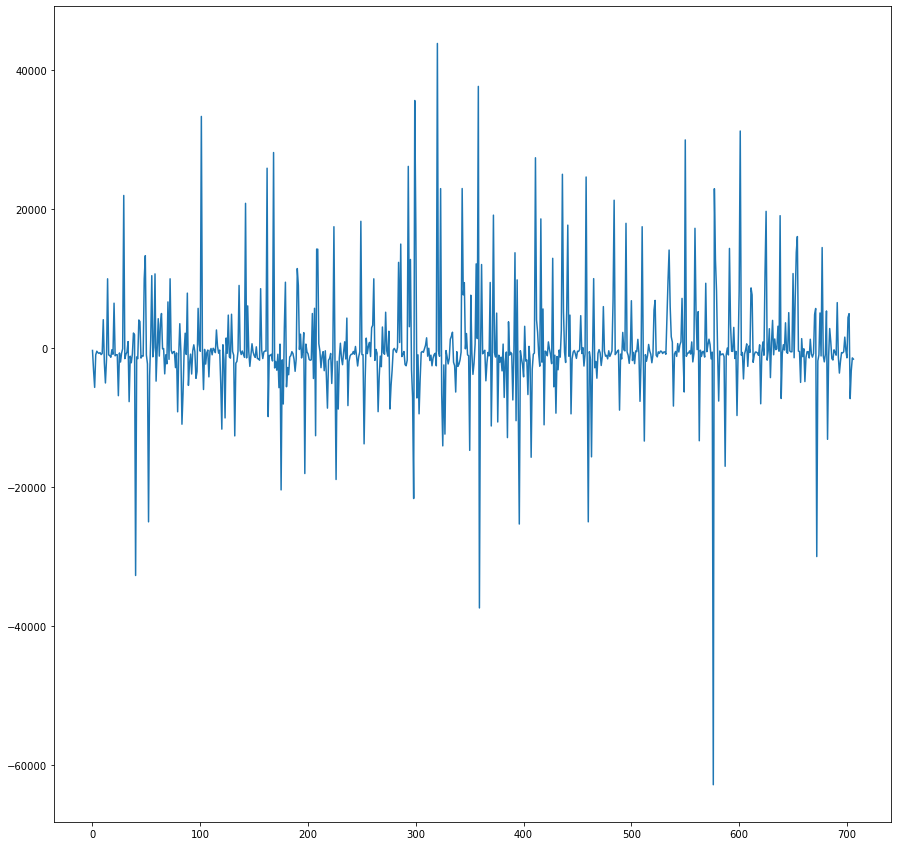

In [67]:
every_d_cash = df.groupby([date.dt.date]).mean()
every_d_cash = every_d_cash.reset_index()
every_d_cash['СУММА'].plot(x=0, y=0, figsize=(15, 15))

In [68]:
# %%timeit
neg_dates = every_d_cash.loc[every_d_cash['СУММА'] < 0]['ВРЕМЯ']
neg_dates

0      2017-04-28
1      2017-04-29
2      2017-04-30
3      2017-05-01
4      2017-05-02
          ...    
700    2019-09-09
703    2019-09-13
704    2019-09-14
705    2019-09-15
706    2019-09-16
Name: ВРЕМЯ, Length: 512, dtype: object

### Pandas B [8/100]

В файле `students.csv` находится список студентов. 
В файле `grades.csv` - оценки за контрольную работу.

Столбец `hash` однозначно идентифицирует студента.

Контрольная работа состояла из 8 заданий. Веса всех заданий - одинаковые.

Требуется ответить на вопросы / вычислить:
- кто написал контрольную работу, а кто - нет?
- средняя оценка по каждому заданию у каждой группы? по всем заданиям у каждой группы?
- топ-5 лидеров и топ-5 отстающих.

По информации об оценках:
- выделить 2 главных компоненты при помощи `sklearn.decomposition.PCA`;
    - визуализировать результат `plt.scatter`;
    
    
- разбить на 4 кластера при помощи `sklearn.cluster.k_means`;
    - визуализировать предыдущий массив, используя в качестве цвета номер кластера;
    - на том же рисунке отметить центр кластера и подписать его номер;
    - вычислить для каждого кластера среднюю и медианную оценки;
    - для каждого кластера вывести номера групп.


In [77]:
import pandas as pd
import matplotlib.pyplot as plt

st = pd.read_csv('students.csv')
gr = pd.read_csv('grades.csv')

## Scipy [14/100]

При решении задач этого раздела подразумевается использование методов и алгоритмов в `Scipy`.


### Scipy A [7/100]

Построить 100 фазовых траекторий $\dot x(x), \dot y(y)$, а также зависимостей $y(x)$ для задачи "хищник-жертва"; подписать оси

Задача "хищник-жертва" описывается моделью Лотки-Вольтерры:


$\begin{cases}
\dot x = \alpha x - \beta x y \\
\dot y = \delta x y - \gamma y \\
\end{cases}$

где $x(t)$ - размер популяции жертв, $y(t)$ - размер популяции хищников.

Параметры модели $\alpha, \beta, \gamma, \delta$ выбрать самостоятельно.

Начальные условия взять на линии $y = x$ на отрезке $[0.1, 1.1]$, параметризовав отрезок при помощи $\alpha \in [0, 1]$.

Вычислить периоды колебаний $T(\alpha)$ размеров популяций жертв и хищников и изобразить график $T(\alpha)$.

In [498]:
np.dot(2, [1, 2, 3, 4, 5])
2 * [1, 2, 3, 4, 5]

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [768]:
from scipy.integrate import solve_ivp

def eq(t, s, alpha, beta, sigma, gamma):
    ds = np.empty_like(s)
    x, y = s
    ds[0] = alpha*x - beta*x*y
    ds[1] = sigma*x*y - gamma*y
    return ds



In [769]:
t0 = 0
s0 = [0.4, 0.4]
t1 = 15
alpha, beta, sigma, gamma = 0.22, 1.2, 3, 1.3

sol = solve_ivp(eq, # правая часть СОДУ 
                [t0, t1],
                s0, # начальный вектор состояния
                method='DOP853', # метод численного интегрирования
                max_step=0.1, # максимальный шаг по времени
                rtol=1e-12, # относительная погрешность
                atol=1e-12,  # абсолютная погрешность
                args = [alpha, beta, sigma, gamma]
               )

sol.t

array([ 0.        ,  0.02502636,  0.12502636,  0.22502636,  0.32502636,
        0.42502636,  0.52502636,  0.62502636,  0.72502636,  0.82502636,
        0.92502636,  1.02502636,  1.12502636,  1.22502636,  1.32502636,
        1.42502636,  1.52502636,  1.62502636,  1.72502636,  1.82502636,
        1.92502636,  2.02502636,  2.12502636,  2.22502636,  2.32502636,
        2.42502636,  2.52502636,  2.62502636,  2.72502636,  2.82502636,
        2.92502636,  3.02502636,  3.12502636,  3.22502636,  3.32502636,
        3.42502636,  3.52502636,  3.62502636,  3.72502636,  3.82502636,
        3.92502636,  4.02502636,  4.12502636,  4.22502636,  4.32502636,
        4.42502636,  4.52502636,  4.62502636,  4.72502636,  4.82502636,
        4.92502636,  5.02502636,  5.12502636,  5.22502636,  5.32502636,
        5.42502636,  5.52502636,  5.62502636,  5.72502636,  5.82502636,
        5.92502636,  6.02502636,  6.12502636,  6.22502636,  6.32502636,
        6.42502636,  6.52502636,  6.62502636,  6.72502636,  6.82

(0.27339633095510435,
 0.6342224018212315,
 0.0450175397551842,
 0.42339433415846267)

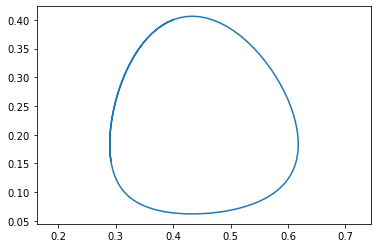

In [770]:
plt.plot(*sol.y)
plt.axis('equal')

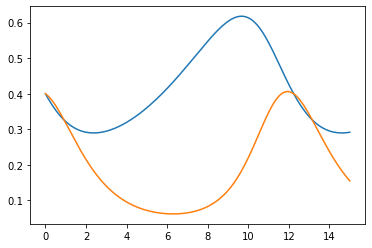

In [771]:
plt.plot(sol.t, sol.y[0]);
plt.plot(sol.t, sol.y[1]);

In [772]:
def eqv(t, s, alpha, beta, sigma, gamma):
    ds = np.empty_like(s)
    x, y = s[::2], s[1::2]
    ds[::2] = np.dot(alpha, x) - np.dot(beta, x)* y
    ds[1::2] = np.dot(sigma, x)* y - np.dot(gamma, y)
    return ds

In [773]:
def event1(t, s, alpha, beta, sigma, gamma):
    pass

def event2(t, s, alpha, beta, sigma, gamma):
    pass

# event1.direction = -1
# event2.direction = -1

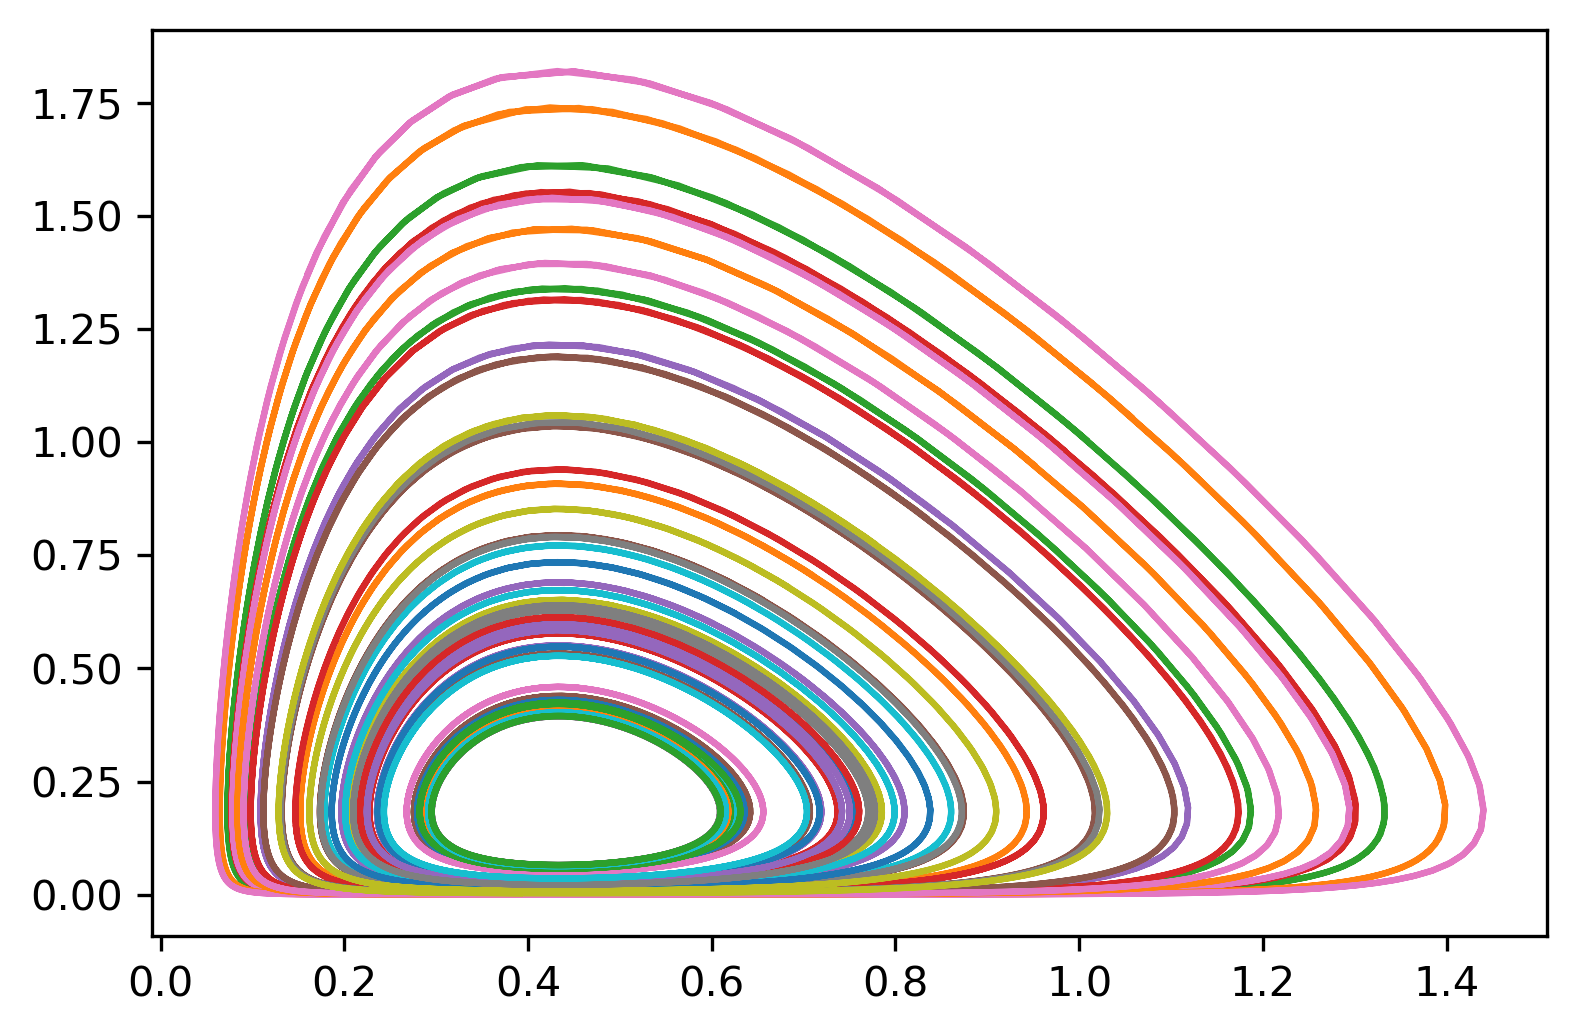

In [774]:
import random

s0 = np.empty(100)
s0[::2] = [random.uniform(0.1, 1.1) for i in range(50)]
s0[1::2] = s0[::2]

t0 = 0
t1 = 40
alpha, beta, sigma, gamma = 0.22, 1.2, 3, 1.3

solv = solve_ivp(eqv, # правая часть СОДУ 
                [t0, t1],
                s0, # начальный вектор состояния
                method='DOP853', # метод численного интегрирования
                max_step=0.1, # максимальный шаг по времени
                rtol=1e-12, # относительная погрешность
                atol=1e-12,  # абсолютная погрешность
                args = [alpha, beta, sigma, gamma]
#                 events = [event1, event2]
               )


plt.figure(dpi=300)
plt.plot(*solv.y);


### Scipy B [7/100]

Численно определить период колебаний [математического маятника](https://ru.wikipedia.org/wiki/Математический_маятник) для всех режимов его движения:
- малые колебания (гармонические),
- большие колебания,
- вращение с переходом через неустойчивое положение равновесия.

Для одного периода колебаний построить графики: 
- изменения угла и угловой скорости от времени $\theta(t), \dot \theta(t)$.
- фазовой траектории $\dot \theta(\theta)$

При помощи `holoviews` создать анимированный график движения маятника в координатной и фазовой плоскостях, схожего с приведенными по [ссылке](https://ru.wikipedia.org/wiki/Математический_маятник).

## Numba [14/100]

При решении задач этого раздела подразумевается использование возможностей `numba` и `numpy` и допускается использование `joblib`.

### Numba A [6/100]

Создать функции для расчета [фрактала Ляпунова](https://ru.wikipedia.org/wiki/Фрактал_Ляпунова), откомпилировать и распараллелить расчеты, используя возможности `numba` или `joblib`.
Построить интерактивный рисунок с возможностью перемещения и масштабирования фрактала при помощи `holoviews`.


In [631]:
!pip install "holoviews[recommended]"

In [338]:
from timeit import timeit
import numpy as np
from numba import jit, njit, prange

import holoviews as hv
from bokeh.plotting import show
hv.extension('bokeh')


ModuleNotFoundError: No module named 'holoviews'

### Numba B [8/100]

Реализовать метод численного интегрирования [Рунге-Кутты](https://ru.wikipedia.org/wiki/Метод_Рунге_—_Кутты) 4 порядка с постоянным шагом по времени. 
Выполнить компиляцию при помощи `numba`.

Сравнить время вычислений при решении задачи Коши для модели, описанной в задаче **Scipy B**:
- scipy.integrate.solve_ivp (метод `DOPRI5`)
- scipy.integrate.ode (метод `DOPRI5`)
- ваша реализация


## Classes [14/100]

Создать иерархию классов `Shape` $\leftarrow$ `Circle`, `Rectangle`, `Union`, `Intersection`, `Not`.

Класс `Shape` содержит абстрактные методы `draw(self, ax=None)`, `distance(self, x, y)`.

Вся иерархия должна содержать:
- конструктор `__init__`:
    - классы `Circle` и `Rectangle` получают необходимые координаты, размеры, цвет;
    - классы `Union`, `Intersection`, `Not` получают ссылки на другие объекты наследников класса `Shape`;
    
    
- метод `draw(self, ax=None)`, который отрисовывает объект при помощи `matplotlib`:
    - `ax` - оси рисунка `matplotlib`; если `ax==None`, то рисовать в текущих осях;
    - `Circle` и `Rectangle` отображают себя при помощи `plt.Circle`, `plt.Rectangle`;
    - классы `Union`, `Intersection`, `Not` отображают объекты, на которых они построены;
    
    
- метод `distance(self, x, y)` возвращает расстояние от границы объекта до точки `(x, y)`:
    - смотри что такое Signed Distance Field в конце текста;
    - расстояние должно иметь знак, т.е., если точка внутри объекта, то расстояние должно быть отрицательным;
    - `Union.distance` = минимальное из расстояний от точки до всех его объектов;
    - `Intersection.distance` = максимальное из расстояний от точки до всех его объектов;
    - `Not.distance` = расстояние, взятое с обратным знаком.

Необходимо:
- создать не менее одного объекта каждого класса (кроме `Shape`) и построить один сборный объект `f`;
- визуализировать объект `f` (должен корректно отработать его метод `draw`);
- вычислить метод `f.distance` на регулярной решетке размером 200х200 точек (решетка должна покрывать весь объект `f`);
- визуализировать полученную матрицу расстояний, например при помощи `plt.pcolormesh`;
- на этом же рисунке изобразить контурную линию уровня 0 (`plt.contour`);
- выполнить аннотацию типов для всех ваших методов и функций.

Пример:

```
c1 = Circle(5, 5, 3, color=(1, 0, 0, 0.5))
c2 = Circle(6.5, 6.5, 1, color=(0, 1, 0, 0.5))
c3 = Circle(3.5, 3.5, 1, color=(0, 1, 0, 0.5))
c4 = Circle(6.5, 3.5, 1, color=(0, 1, 0, 0.5))
c5 = Circle(3.5, 6.5, 1, color=(0, 1, 0, 0.5))
c6 = Circle(5, 5, 1, color=(0, 1, 0, 0.5))
r = Rect(3.5, 3.5, 6.5, 6.5, color=(0, 0, 1, 0.5))
u = Intersection(Intersection(Union(r, c2, c3, c4, c5), c1), Not(c6))
```

<table>
    <tr>
        <td><img src='classes_plot.png' width=350/></td>
        <td><img src='classes_sdf.png' width=400/></td>
    </tr>
</table>

Полезные ссылки:
- [Основы Signed Distance Field в 2D](https://habr.com/ru/post/438316/)

In [334]:
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt
import numpy as np

class Shape(ABC):
        
    inheritors = []
        
    def __init__(self):
        Shape.inheritors.append(self)
    
    @abstractmethod
    def draw(self, ax=None):
        pass
    
    @abstractmethod
    def distance(self, x: float, y: float) -> float:
        pass
    
    

In [324]:
class Circle(Shape):
    def __init__(self, x: float, y: float, r: float, color=(0, 0, 0, 0.5)):
        super().__init__()
        self.x = x
        self.y = y
        self.r = r
        self.color = color
    
    def draw(self, ax=None):
        ax_ = ax if ax is not None else plt.gca()
        circle = plt.Circle((self.x, self.y), self.r, color=self.color)
        ax_.add_patch(circle)
        return ax

    def distance(self, x: float, y: float) -> float:
        _l = np.linalg.norm([self.x - x, self.y - y])
        _sin = ((x - self.x)/_l) if (_l != 0) else 1
        _cos = ((y - self.y)/_l) if (_l != 0) else 1
        return np.linalg.norm([_l*_sin, _l*_cos]) - self.r

In [325]:
class Rectangle(Shape):
    def __init__(self, x: float, y: float, w: float, h: float, color=(0, 0 , 0, 0.5)):
        super().__init__()
        self.x = x
        self.y = y
        self.w = w
        self.h = h
        self.color = color
        
    def draw(self, ax=None):
        ax_ = ax if ax is not None else plt.gca()
        rect = plt.Rectangle((self.x, self.y), width=self.w, height=self.h, color=self.color)
        ax_.add_patch(rect)
        return ax

    def distance(self, x: float, y: float) -> float:
        if x <= self.x:
            if y < self.y:
                return np.linalg.norm([self.x - x, self.y - y])
            if (y >= self.y) and (y <= self.y+self.h):
                return self.x - x
            if (y > self.y+self.h):
                return np.linalg.norm([self.x - x, self.y + self.h - y])
        if (x > self.x) and (x < self.x+self.w):
            if y < self.y:
                return self.y - y
            if (y >= self.y) and (y <= self.y+self.h):
                return -np.min([x-self.x, self.x+self.w-x, self.y+self.h-y, y-self.y])
            if (y > self.y+self.h):
                return y - self.y-self.h
        if x >= self.x+self.w:
            if y < self.y:
                return np.linalg.norm([x - self.x+self.y, self.y - y])
            if (y >= self.y) and (self.y <= self.y+self.h):
                return x - self.x-self.w
            if y > self.y+self.h:
                return np.linalg.norm([x - self.x-self.w, y - self.y-self.h])
            
    

In [326]:
class Union(Shape):
    
    def __init__(self, *shapes):
        self.shapes = shapes
        
    def draw(self, ax=None):
        for shape in self.shapes:
            shape.draw(ax)
        return ax
    
    def distance(self, x: float, y: float) -> float:
        return np.min([shape.distance(x, y) for shape in self.shapes])
        

In [327]:
class Intersection(Shape):
    
    def __init__(self, *shapes):
        self.shapes = shapes
        
    def draw(self, ax=None):
        for shape in self.shapes:
            shape.draw(ax)
        return ax
    
    def distance(self, x: float, y: float) -> float:
        return np.max([shape.distance(x, y) for shape in self.shapes])
    
    

In [328]:
class Not(Shape):
    
    def __init__(self, shape: Shape):
        self.shape = shape
        
    def draw(self, ax=None):
        self.shape.draw(ax)
        return ax
    
    def distance(self, x: float, y: float) -> float:
        return -self.shape.distance(x, y)

<ipython-input-336-a180bb1fa34e>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  a = ax[1].pcolormesh(X, Y, c, cmap='plasma')
<ipython-input-336-a180bb1fa34e>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


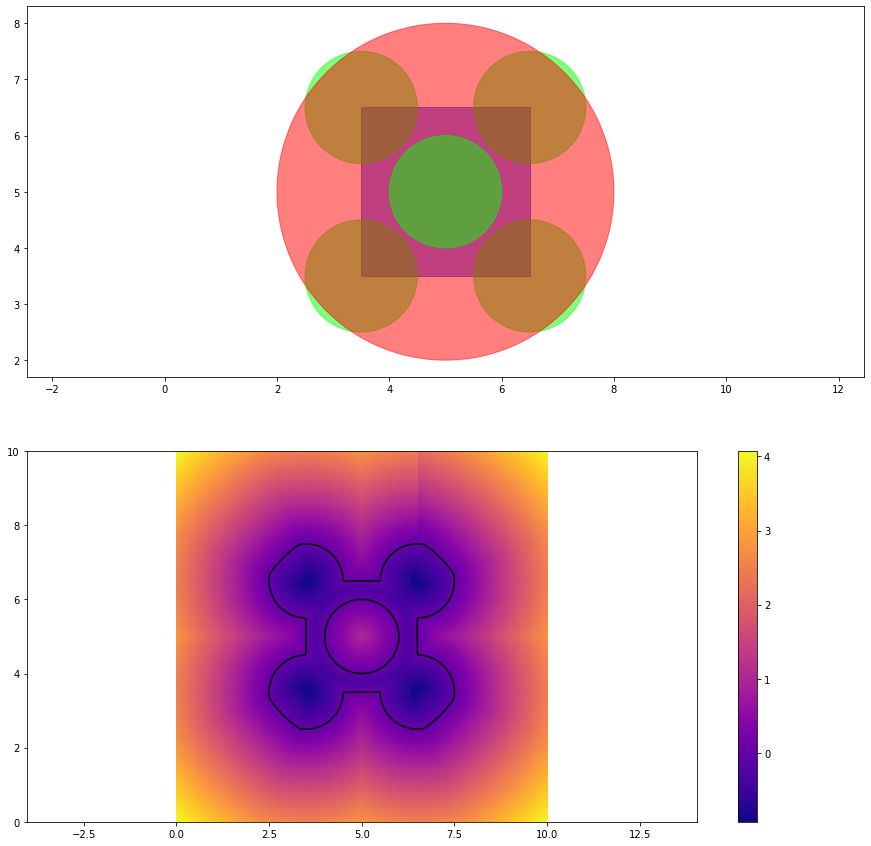

In [336]:
c1 = Circle(5, 5, 3, color=(1, 0, 0, 0.5))
c2 = Circle(6.5, 6.5, 1, color=(0, 1, 0, 0.5))
c3 = Circle(3.5, 3.5, 1, color=(0, 1, 0, 0.5))
c4 = Circle(6.5, 3.5, 1, color=(0, 1, 0, 0.5))
c5 = Circle(3.5, 6.5, 1, color=(0, 1, 0, 0.5))
c6 = Circle(5, 5, 1, color=(0, 1, 0, 0.5))
r = Rectangle(3.5, 3.5, 3, 3, color=(0, 0, 1, 0.5))
u = Intersection(Intersection(Union(r, c2, c3, c4, c5), c1), Not(c6))

fig, ax = plt.subplots(2, 1, figsize=(15, 15))

u.draw(ax[0])
ax[0].axis('equal')

a = np.linspace(0, 10, 200)
b = np.linspace(0, 10, 200)

Y, X = np.mgrid[0:10:200j, 0:10:200j]
pts = np.column_stack((X.flatten(), Y.flatten()))

c = [u.distance(p[0], p[1]) for p in pts]
c = np.array(c).reshape(200, 200)

a = ax[1].pcolormesh(X, Y, c, cmap='plasma')

ax[1].contour(X, Y, c, levels=0, colors='black')
ax[1].axis('equal')
fig.colorbar(a)
fig.show()

## Generators [10/100]

При решении задач этого раздела необходимо создать генераторы, т.е. функции, позволяющие вычислять следующий элемент последовательности. Допускается конструирование на основе существующих генераторов (напр., `range`, `map`, и т.д.)


## Generators A [5/100]

Создать генераторы:

 - `lcg` для вычисления последовательности псевдослучайных чисел ([линейно-конгруэнтный генератор](https://en.wikipedia.org/wiki/Linear_congruential_generator#:~:text=Линейный%20конгруэнтный%20генератор%20(LCG)-это%20алгоритм%2C,известных%20алгоритмов%20генерации%20псевдослучайных%20чисел)),
 - `matmul` для вычисления матричного произведения двух матриц, заданных списками списков.

In [765]:
def lcg(m: int, a: int, c: int, X_n: int):
    while True:
        X_n = (a * X_n + c) % m
        yield X_n
        
        

In [766]:
linear_c_g = lcg(9, 2, 0, 1)

In [767]:
for i in range(15):
    print(next(linear_c_g))

2
4
8
7
5
1
2
4
8
7
5
1
2
4
8


## Generators B [5/100]

Создать генератор `progress`, работающий аналогично `range` и дополнительно выводящий на экран `progress bar` (полосу прогресса).
Должны быть реализованы все варианты работы `range` (отрицательные и неотрицательные границы диапазона и шаг).

Для реализации полосы прогресса можно, например, воспользоваться виджетом `panel.indicators.Progress` из модуля `panel`, установленного вместе с `holoviews`.

Продемонстрировать работу генератора в цикле вызвав функцию `sleep` из модуля `time`.

In [743]:
# Честно, говоря, не знаю, работает ли код, т.к. holoview не хочет импортироваться

import time
from progress.bar import IncrementalBar


def progress(start, stop, step=1):
    x = start
    prog_bar = IncrementalBar('Countdown', max = (stop-1-start))
    while x < stop:
        yield x
        prog_bar.next()
        x += step
    prog_bar.finish()

for i in progress(0, 10):
    print(i)
    time.sleep(1)

ModuleNotFoundError: No module named 'progress'

## Decorators and Context Managers [12/100]

При решении задач этого раздела необходимо создать:
- декоратор, т.е. функцию или класс, позволяющую изменять поведение функции или метода, не затрагивая код их использующий, т.е.:

```
@my_decorator
def old_func(...):
    some instructions
    
old_func(...) # function call works as it was before decoration
```

- менеджер контекста, т.е. функцию (декорированную `@contextmanager`) или класс, обладающий методами `__enter__` и `__exit__`, позволяющий выполнять действия в некотором контексте, т.е.:

```
with my_context(...) as ctx:
    do something
    use ctx if needed
```

## Decorators and Context Managers A [4/100]

Создать декоратор, позволяющий перехватывать исключения заданного класса и выводить информацию о вызове функции и перехваченном исключении в лог-файл при помощи стандартного модуля `logging`.
Продемонстрировать его работу.

## Decorators and Context Managers B [4/100]

Создать менеджер контекста, позволяющий перехватывать исключения заданного класса и выводить информацию о вызове функции и перехваченном исключении в лог-файл при помощи стандартного модуля `logging`.
Продемонстрировать его работу.

## Decorators and Context Managers C [4/100]

Объединить декоратор из задания [A] и менеджер контекста из задания [B] в одном классе. Продемонстрировать его работу.